# Sharpe Ration


In this project we are calculating sharpe ratio first with your own code and then employing `PyPortfolioOpt` library using Apple, Amazon, 3M, and Exxon companies. Please see [this website](https://pyportfolioopt.readthedocs.io/en/latest/) for more information about `PyPortfolioOpt`. The daily data covers the period of 2021-01-01 and 2022-01-01. To accomplish this task:

* Annualized the daily return and standard deviation for each respective stock.
* Draw efficient frontier.
* Assume risk free rate to be 0.01.
* Calculate the sharpe ratio and interpret which one is the best.

Hint: Please use `plot_efficient_frontier` function in `PyPortfolioOpt` to draw efficient frontier.

Again, please keep in mind that you are going to accomplish the task first with your own code and using `PyPortfolioOpt` library. Also note that you do not need to get exactly the same result.

In [53]:
#codes and explanations here.

In [54]:
pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from pypfopt import plotting
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [57]:
stocks = ['AAPL', 'AMZN', 'MMM', 'XOM']
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2021,1,1)
stock_data = yf.download(stocks, start= start, end=end, interval='1d')['Close']

[*********************100%***********************]  4 of 4 completed


In [58]:
stock_data

,AAPL,AMZN,MMM,XOM
Date,,,,
2020-01-02 00:00:00-05:00,75.087502,94.900497,180.000000,70.900002
2020-01-03 00:00:00-05:00,74.357498,93.748497,178.449997,70.330002
2020-01-06 00:00:00-05:00,74.949997,95.143997,178.619995,70.870003
2020-01-07 00:00:00-05:00,74.597504,95.343002,177.899994,70.290001
2020-01-08 00:00:00-05:00,75.797501,94.598503,180.630005,69.230003
...,...,...,...,...
2020-12-24 00:00:00-05:00,131.970001,158.634506,174.520004,41.599998
2020-12-28 00:00:00-05:00,136.690002,164.197998,174.710007,41.740002
2020-12-29 00:00:00-05:00,134.869995,166.100006,173.850006,41.270000


##Annualized the daily return and standard deviation for each respective stock

In [59]:
stock_data_shift = stock_data.shift(1) 
returns = np.log(stock_data/stock_data_shift) #This is to make the length equal
returns.dropna(inplace=True)

In [60]:
returns.describe()

,AAPL,AMZN,MMM,XOM
count,252.000000,252.000000,252.000000,252.000000
mean,0.002259,0.002143,-0.000117,-0.002152
std,0.029440,0.024198,0.023659,0.033399
min,-0.137708,-0.082535,-0.097363,-0.130391
25%,-0.010488,-0.010538,-0.009617,-0.018897
50%,0.001653,0.002490,0.001161,-0.004792
75%,0.016930,0.014432,0.010746,0.012870
max,0.113157,0.076308,0.118659,0.119442


In [61]:
#For Annualized returns we have to muntiply with 252 business days in that year
returns.mean()*252

AAPL    0.569361
AMZN    0.539979
MMM    -0.029372
XOM    -0.542347
dtype: float64

In [62]:
#For Annualized covariance
returns.cov() * np.sqrt(252)

,AAPL,AMZN,MMM,XOM
AAPL,0.013758,0.007947,0.005863,0.007257
AMZN,0.007947,0.009295,0.002683,0.003098
MMM,0.005863,0.002683,0.008886,0.008297
XOM,0.007257,0.003098,0.008297,0.017708


##For Drawing Efficient Frontier

In [63]:
mu = expected_returns.mean_historical_return(stock_data)
S = risk_models.sample_cov(stock_data)

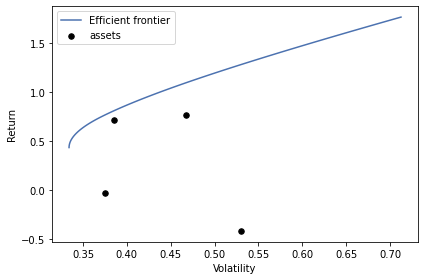

In [73]:
EfFrnt = EfficientFrontier(mu, S, weight_bounds=(None, None))
EfFrnt.add_constraint(lambda w: w[0] >= 0.23)
EfFrnt.add_constraint(lambda w: w[2] == 0.18)
EfFrnt.add_constraint(lambda w: w[3] <= 0.14)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(EfFrnt, ax=ax, show_assets=True, ef_param_range=None)
plt.show()


##Calculation of sharpe ratio using risk free rate

###Here we have written out own code for finding sharpe ratio for all the stocks.

In [74]:
risk_free_rate = 0.01 #We are asked to use this rate
ratios={}
def sharpe(stocks, risk_free_rate, assets_count):
    for i,j in zip(stocks, range(assets_count)):
        ratios[i] = round((returns.iloc[:, j].mean()* 252 - risk_free_rate) / (returns.iloc[:, j].std() * np.sqrt(252)), 4)
    return ratios

In [75]:
stocks = returns.columns[:4]
ratios = sharpe(stocks, risk_free_rate, 4)
ratios

{'AAPL': 1.1969, 'AMZN': 1.3797, 'MMM': -0.1048, 'XOM': -1.0418}

###Interpretation of above results:

We can see that the sharpe ratio of Amazon is higher which also means that returns are higher for this stock. i.e. Amazon

We can see that the sharpe ratio of XOM is higher which also means that returns are higher for this stock. i.e. XOM

###Here we are using the max_sharpe() function of EfficientFrontier Library to find out the sharpe ratio of the portfolio.

In [76]:
efFrnt = EfficientFrontier(mu, S)
efFrnt.max_sharpe()

OrderedDict([('AAPL', 0.28810501790724),
             ('AMZN', 0.7118949820927601),
             ('MMM', 0.0),
             ('XOM', 0.0)])


###Interpretation:

So, here we can see that the weight of amazon is highest in the portfolio


